In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import string
import re , sys
from nltk.tokenize import word_tokenize
from string import punctuation 
from nltk.corpus import stopwords 

In [22]:
stopwords = set(stopwords.words('english') + list(punctuation) + ['AT_USER','URL'])
dataset = pd.read_csv('demonetization-tweets.csv', encoding = "ISO-8859-1")
dataset.head()

,Unnamed: 0,X,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted
0,1,1,RT @rssurjewala: Critical question: Was PayTM ...,False,0,NaN,2016-11-23 18:40:30,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",HASHTAGFARZIWAL,331,True,False
1,2,2,RT @Hemant_80: Did you vote on #Demonetization...,False,0,NaN,2016-11-23 18:40:29,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",PRAMODKAUSHIK9,66,True,False
2,3,3,"RT @roshankar: Former FinSec, RBI Dy Governor,...",False,0,NaN,2016-11-23 18:40:03,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",rahulja13034944,12,True,False
3,4,4,RT @ANI_news: Gurugram (Haryana): Post office ...,False,0,NaN,2016-11-23 18:39:59,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",deeptiyvd,338,True,False
4,5,5,RT @satishacharya: Reddy Wedding! @mail_today ...,False,0,NaN,2016-11-23 18:39:39,False,NaN,8.014954e+17,NaN,"<a href=""http://cpimharyana.com"" rel=""nofollow...",CPIMBadli,120,True,False


In [23]:
def clean_tweet(tweet):
    tweet = re.sub('http\S+\s*', '', tweet)  # remove URLs
    tweet = re.sub('RT|cc', '', tweet)  # remove RT and cc
    tweet = re.sub('#\S+', '', tweet)  # remove hashtags
    tweet = re.sub('@\S+', '', tweet)  # remove mentions
    tweet = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), '', tweet)  # remove punctuations
    tweet = re.sub('\s+', ' ', tweet)  # remove extra whitespace
    tweet = tweet.lower() # convert text to lower-case
    tokens = tweet.split(" ")
    tweet = [ x for x in tokens if len(x) < 25 ]
    tweet = " ".join(tweet)
    return tweet

In [24]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

analyser = SentimentIntensityAnalyzer()
dataset['cleaned_text'] = dataset.text.apply(lambda x: clean_tweet(x))
dataset['sentiment_compound_polarity'] = dataset.cleaned_text.apply(lambda x: analyser.polarity_scores(x)['compound'])
dataset['sentiment_neutral'] = dataset.cleaned_text.apply(lambda x: analyser.polarity_scores(x)['neu'])
dataset['sentiment_negative'] = dataset.cleaned_text.apply(lambda x: analyser.polarity_scores(x)['neg'])
dataset['sentiment_positive'] = dataset.cleaned_text.apply(lambda x: analyser.polarity_scores(x)['pos'])
dataset['sentiment_type']=''
dataset.loc[dataset.sentiment_compound_polarity==0,'sentiment_type']= 2 #neutral
dataset.loc[dataset.sentiment_compound_polarity>0,'sentiment_type']= 0 #positive
dataset.loc[dataset.sentiment_compound_polarity<0,'sentiment_type']= 1 #negative
#dataset.loc[dataset.sentiment_compound_polarity==0,'sentiment_type']= 'neutral'
#dataset.loc[dataset.sentiment_compound_polarity>0,'sentiment_type']= 'positive'
#dataset.loc[dataset.sentiment_compound_polarity<0,'sentiment_type']= 'negative'
#dataset.columns

In [25]:
positive = dataset[dataset['sentiment_type'] == 0]
negative = dataset[dataset['sentiment_type'] == 1]
neutral= dataset[dataset['sentiment_type'] == 2]
frames = [positive, negative,neutral]
orgDataSet = pd.concat(frames)
orgDataSet = orgDataSet.reset_index()
orgDataSet.head()

,index,Unnamed: 0,X,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,...,screenName,retweetCount,isRetweet,retweeted,cleaned_text,sentiment_compound_polarity,sentiment_neutral,sentiment_negative,sentiment_positive,sentiment_type
0,0,1,1,RT @rssurjewala: Critical question: Was PayTM ...,False,0,NaN,2016-11-23 18:40:30,False,NaN,...,HASHTAGFARZIWAL,331,True,False,critical question was paytm informed about ed...,0.1027,0.750,0.115,0.135,0
1,7,8,8,RT @Joydeep_911: Calling all Nationalists to j...,False,0,NaN,2016-11-23 18:38:20,False,NaN,...,KARUNASHANKEROJ,112,True,False,calling all nationalists to join walk for and...,0.5859,0.730,0.000,0.270,0
2,8,9,9,RT @sumitbhati2002: Many opposition leaders ar...,False,0,NaN,2016-11-23 18:38:09,False,NaN,...,sumitbhati2002,1,True,False,many opposition leaders are with on the and r...,0.7003,0.655,0.000,0.345,0
3,10,11,11,Many opposition leaders are with @narendramodi...,False,1,NaN,2016-11-23 18:37:47,False,NaN,...,sumitbhati2002,1,False,False,many opposition leaders are with on the and re...,0.8176,0.622,0.000,0.378,0
4,11,12,12,RT @Joydas: Question in Narendra Modi App wher...,False,0,NaN,2016-11-23 18:37:25,False,NaN,...,MonishGavand,120,True,False,question in narendra modi app where pm is tak...,0.4019,0.838,0.000,0.162,0


In [26]:
print ("Total Number of tweets")
print (orgDataSet.shape[0])
print ("Number of POSITIVE tweets - ", str(len(orgDataSet[orgDataSet['sentiment_type'] == 0])))
#print ("Percentage of POSITIVE tweets")
#print (len(dataset[dataset['sentiment_type'] == 'positive'])/ len(dataset) * 100)
print ("Number of NEGATIVE tweets - ", str(len(orgDataSet[orgDataSet['sentiment_type'] == 1])))
#print ("Percentage of NEGATIVE tweets")
#print (len(dataset[dataset['sentiment_type'] == 'negative'])/ len(dataset) * 100)
print ("Number of NEUTRAL tweets - ", str(len(orgDataSet[orgDataSet['sentiment_type'] == 2])))
#print ("Percentage of NEUTRAL tweets")
#print (len(dataset[dataset['sentiment_type'] == 'neutral'])/ len(dataset) * 100)

Total Number of tweets
14940
Number of POSITIVE tweets -  6376
Number of NEGATIVE tweets -  4065
Number of NEUTRAL tweets -  4499


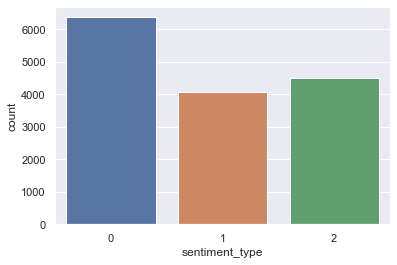

In [28]:
import seaborn as sns
sns.set(style="darkgrid")
sns.countplot(x=orgDataSet['sentiment_type'])

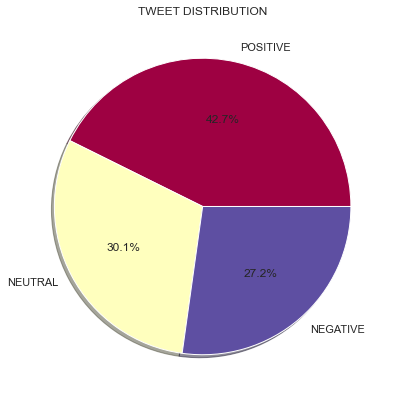

In [29]:
from matplotlib.gridspec import GridSpec
targetCounts = dataset.sentiment_type.value_counts()
targetLabels  =['POSITIVE','NEUTRAL', 'NEGATIVE']
# Make square figures and axes
plt.figure(1, figsize=(15,15))
the_grid = GridSpec(2, 2)


cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 3)]
plt.subplot(the_grid[0, 1], aspect=1, title='TWEET DISTRIBUTION')

source_pie = plt.pie(targetCounts, labels=targetLabels, autopct='%1.1f%%', shadow=True, colors=colors)
plt.show()

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

X = orgDataSet['cleaned_text'].values
y = orgDataSet['sentiment_type'].values

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0, test_size=0.3)

#print("Number transactions X_train dataset: ", X_train.shape)
#print("Number transactions y_train dataset: ", y_train.shape)
#print("Number transactions X_test dataset: ", X_test.shape)
#print("Number transactions y_test dataset: ", y_test.shape)

In [31]:
from nltk.tokenize import TweetTokenizer

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.naive_bayes import MultinomialNB

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import make_scorer, accuracy_score, f1_score
from sklearn.metrics import roc_curve, auc, classification_report
from sklearn.metrics import confusion_matrix, roc_auc_score, recall_score, precision_score

In [33]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=5000, stop_words='english')
tfidf_vectorizer.fit(X_train)

X_train_vectorized = tfidf_vectorizer.transform(X_train)
X_test_vectorized = tfidf_vectorizer.transform(X_test)

In [36]:
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB

print ("Multinomial Naive Bayes")
mnb_model = MultinomialNB()
#print (mnb_model)
y = y_train.astype('int')
t = y_test.astype('int')
mnb_model.fit(X_train_vectorized, y)
test_predictedValues = mnb_model.predict(X_test_vectorized)
train_predictedValues = mnb_model.predict(X_train_vectorized)

trainingAccuracyScore = mnb_model.score(X_train_vectorized, y) * 100
testingAccuracyScore = mnb_model.score(X_test_vectorized, t) * 100
print ("\nTraining Accuracy Score - %.2f " % (trainingAccuracyScore), "%")
print ("Testing Accuracy Score - %.2f " % (testingAccuracyScore), "%")
#print ("\n Following is the Classification Report for Multinomial Naive Bayes - ")
#print (classification_report(t, test_predictedValues))

Multinomial Naive Bayes

Training Accuracy Score - 92.26  %
Testing Accuracy Score - 87.91  %



 Following is the Classification Report for Multinomial Naive Bayes - 
MultinomialNB accuracy is 87.91%


[Text(0.5, 0, 'precision'), Text(1.5, 0, 'recall'), Text(2.5, 0, 'f1-score')]

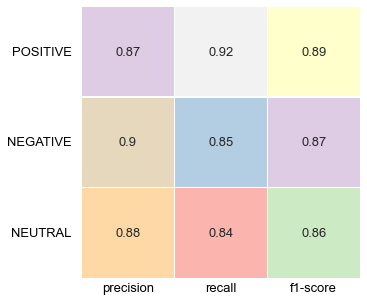

In [37]:
import sys,re
print ("\n Following is the Classification Report for Multinomial Naive Bayes - ")
cf_report = classification_report(t, test_predictedValues)
accuracy= metrics.accuracy_score(mnb_model.predict(X_test_vectorized),t)
print("MultinomialNB accuracy is "+ str('{:4.2f}'.format(accuracy*100))+'%')
def classification_report_to_dataframe(cf_report):
    report_data = []
    lines = cf_report.split('\n')
    for line in lines[2:-3]:
        newline = re.sub(r' +',",",line)
        row_data = newline.split(",")
        if(len(row_data) == 6):
            row = {}
            row['precision'] = float(row_data[2])
            row['recall'] = float(row_data[3])
            row['f1_score'] = float(row_data[4])
            report_data.append(row)
    dataframe = pd.DataFrame.from_dict(report_data)
    return dataframe

reqDataFrame = classification_report_to_dataframe(cf_report)

classNames = ['POSITIVE','NEGATIVE','NEUTRAL']
labels = [0,1,2]

plt.figure(figsize=(5,5))
ax= plt.subplot()
sns.heatmap(reqDataFrame, annot=True, ax = ax, cmap="Pastel1", cbar=False, linewidths=.5, annot_kws={"size": 13}); #annot=True to annotate cells
ax.yaxis.set_ticklabels(classNames, rotation=0, fontsize="13", va="center", color='black')
ax.xaxis.set_ticklabels(['precision','recall', 'f1-score'], rotation=0, fontsize="13", va="center", color='black')


In [38]:
from sklearn.naive_bayes import BernoulliNB
bnb=BernoulliNB()
bnb.fit(X_train_vectorized, y)
a=bnb.predict(X_test_vectorized)
accuracy= metrics.accuracy_score(a,t)
print("BernoulliNB accuracy is "+ str('{:4.2f}'.format(accuracy*100))+'%')

#print (classification_report(t, a))

BernoulliNB accuracy is 89.25%


[Text(0.5, 0, 'precision'), Text(1.5, 0, 'recall'), Text(2.5, 0, 'f1-score')]

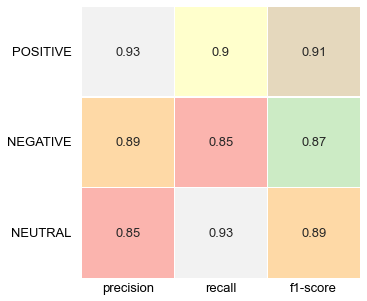

In [39]:
cf=classification_report(t, a)
reqDataFrame = classification_report_to_dataframe(cf)

classNames = ['POSITIVE','NEGATIVE','NEUTRAL']
labels = [0,1,2]

plt.figure(figsize=(5,5))
ax= plt.subplot()
sns.heatmap(reqDataFrame, annot=True, ax = ax, cmap="Pastel1", cbar=False, linewidths=.5, annot_kws={"size": 13}); #annot=True to annotate cells
ax.yaxis.set_ticklabels(classNames, rotation=0, fontsize="13", va="center", color='black')
ax.xaxis.set_ticklabels(['precision','recall', 'f1-score'], rotation=0, fontsize="13", va="center", color='black')
